# Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
X_train.shape

(11610, 8)

In [10]:
X_valid.shape

(3870, 8)

In [11]:
X_test.shape

(5160, 8)

# build sequential model

since this is a regression problem, we will be having a single output neuron without any 
activation function.

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

C:\Users\Shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [14]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['mae'])  #mean absulute error

In [15]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.5727 - mae: 1.4414 - val_loss: 2.3514 - val_mae: 0.6866
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7713 - mae: 0.6605 - val_loss: 0.9778 - val_mae: 0.5965
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6535 - mae: 0.5987 - val_loss: 0.5988 - val_mae: 0.5504
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6059 - mae: 0.5678 - val_loss: 0.5228 - val_mae: 0.5252
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5705 - mae: 0.5477 - val_loss: 0.5029 - val_mae: 0.5113
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5415 - mae: 0.5320 - val_loss: 0.4871 - val_mae: 0.4986
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5177 - mae: 0.5194 - val_loss: 0.4688 - val_mae: 0.4875
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4981 - mae: 0.5089 - val_loss: 0.4489 - val_mae: 0.4778
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [16]:
mae_test = model.evaluate(X_test, y_test)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3966 - mae: 0.4495


In [17]:
model_history.history

{'loss': [2.3050551414489746,
  0.7135887145996094,
  0.6174205541610718,
  0.5731618404388428,
  0.5405828356742859,
  0.5142568945884705,
  0.49269402027130127,
  0.475090891122818,
  0.46079060435295105,
  0.44908782839775085,
  0.43956059217453003,
  0.43165770173072815,
  0.4251391589641571,
  0.41959038376808167,
  0.41472458839416504,
  0.41044530272483826,
  0.4067102372646332,
  0.40337154269218445,
  0.40035781264305115,
  0.3975885510444641],
 'mae': [1.0427238941192627,
  0.6313320398330688,
  0.5796720385551453,
  0.5522480607032776,
  0.5338378548622131,
  0.5193967223167419,
  0.5075551271438599,
  0.4976554214954376,
  0.4894125759601593,
  0.48245328664779663,
  0.47663676738739014,
  0.4716731607913971,
  0.4674936830997467,
  0.4639121890068054,
  0.4608144462108612,
  0.45812514424324036,
  0.4558030068874359,
  0.45373252034187317,
  0.4518834054470062,
  0.45018354058265686],
 'val_loss': [2.351409673690796,
  0.9778374433517456,
  0.5988344550132751,
  0.52278417

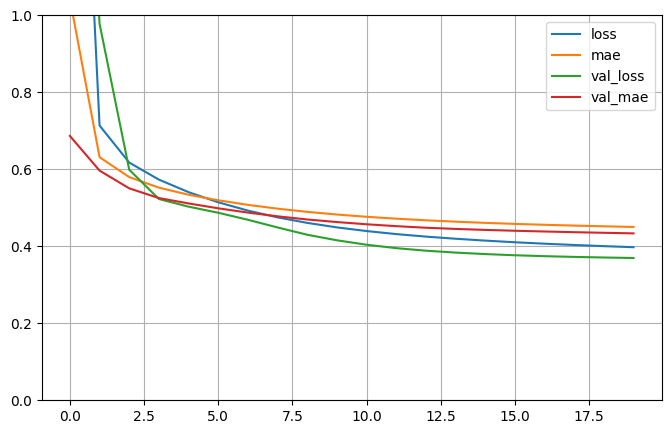

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [19]:
X_new = X_test[:3]

In [20]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
[[0.68159634]
 [1.7929503 ]
 [3.2882109 ]]
[0.477   0.458   5.00001]


In [21]:
# del model

In [22]:
del model

In [23]:
keras.backend.clear_session() # clear session of keras to free the resources for next model

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

![](Functional.JPG "Title")

In [24]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [25]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 30)                │             270 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 30)                │             930 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 38)                │               0 │ input_layer[0][0],         │
│                               │                           │                 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              39 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['mae'])

In [27]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.2945 - mae: 1.1055 - val_loss: 9.0310 - val_mae: 0.6984
Epoch 2/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7901 - mae: 0.6384 - val_loss: 1.5648 - val_mae: 0.6019
Epoch 3/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6932 - mae: 0.5996 - val_loss: 0.6071 - val_mae: 0.5568
Epoch 4/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6472 - mae: 0.5796 - val_loss: 0.5757 - val_mae: 0.5412
Epoch 5/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6157 - mae: 0.5654 - val_loss: 0.5374 - val_mae: 0.5281
Epoch 6/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5904 - mae: 0.5538 - val_loss: 0.5191 - val_mae: 0.5184
Epoch 7/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5696 - mae: 0.5441 - val_loss: 0.5010 - val_mae: 0.5098
Epoch 8/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5520 - mae: 0.5358 - val_loss: 0.4861 - val_mae: 0.5022
Epoch 9/80
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [40]:
mae_test = model.evaluate(X_test, y_test)


162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3419 - mean_absolute_error: 0.4147


In [29]:
model_history.history

{'loss': [1.7369685173034668,
  0.766069769859314,
  0.6461241245269775,
  0.6060988306999207,
  0.5778873562812805,
  0.5558015704154968,
  0.5375270247459412,
  0.5221253037452698,
  0.5088565349578857,
  0.49735328555107117,
  0.48719000816345215,
  0.4781440198421478,
  0.4701075255870819,
  0.4627877473831177,
  0.45602521300315857,
  0.44980838894844055,
  0.4440165162086487,
  0.43866127729415894,
  0.43371301889419556,
  0.42910492420196533,
  0.4248027503490448,
  0.42081406712532043,
  0.41711869835853577,
  0.41369348764419556,
  0.41049307584762573,
  0.4074825942516327,
  0.40463313460350037,
  0.4019010066986084,
  0.39928102493286133,
  0.3967796564102173,
  0.3944195508956909,
  0.3921642005443573,
  0.38996610045433044,
  0.38783183693885803,
  0.38579145073890686,
  0.3838110864162445,
  0.3819584548473358,
  0.3801908493041992,
  0.3784790635108948,
  0.37686267495155334,
  0.37531980872154236,
  0.3738511800765991,
  0.37241584062576294,
  0.3710286021232605,
  0.36

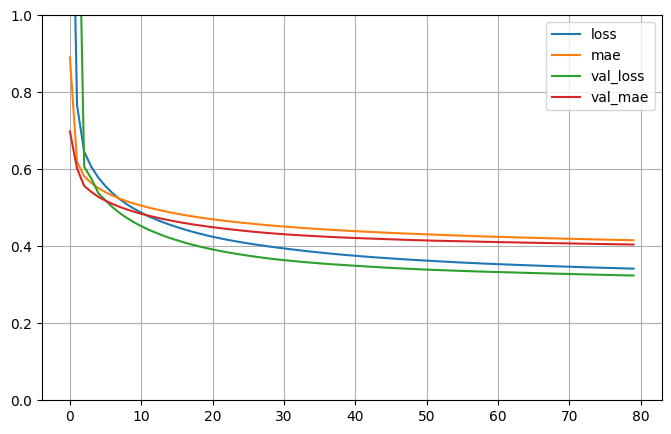

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

# Saving and Restoring

In [31]:
%pwd

'C:\\Users\\Shubham\\Academics\\SKILL_SET\\Machine-Learning&Deep-Learning\\section-24'

In [32]:
model.save("my_Func_model.h5")

In [33]:
%pwd

'C:\\Users\\Shubham\\Academics\\SKILL_SET\\Machine-Learning&Deep-Learning\\section-24'

In [34]:
# %cd C:\\Users\\pukhr  #change working directory

In [35]:
# %cd C:\\Users\\pukhr

In [36]:
del model

In [37]:
keras.backend.clear_session()

In [39]:
model = keras.models.load_model("my_Func_model.h5")

In [41]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 30)                │             270 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 30)                │             930 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 38)                │               0 │ input_layer[0][0],         │
│                               │                           │                 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              39 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,241 (4.85 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [42]:
y_pred = model.predict(X_new)
print (y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[0.56717336]
 [1.6539111 ]
 [4.167504  ]]


# Using Callbacks during Training

In [43]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

C:\Users\Shubham\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [49]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.keras")

In [50]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.6488 - val_loss: 1.2229
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7930 - val_loss: 0.6326
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6551 - val_loss: 0.5594
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6063 - val_loss: 0.5233
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5701 - val_loss: 0.4992
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5417 - val_loss: 0.4839
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5191 - val_loss: 0.4753
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5011 - val_loss: 0.4712
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4867 - val_loss: 0.4697
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4750 - val_loss: 0.4699


In [51]:
del model
keras.backend.clear_session()

In [53]:
model = keras.models.load_model("Model-10.keras")

In [54]:
mse_test = model.evaluate(X_test, y_test,batch_size=5160)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.4407


In [55]:
print (mse_test)

0.44072309136390686


In [56]:
model.metrics_names

['loss']

In [57]:
y_pred = model.predict(X_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [58]:
y_diff=y_pred-y_test

In [59]:
y_pred.shape

(5160, 1)

In [60]:
mse = (y_diff^2)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Best Model Only

In [61]:
del model
keras.backend.clear_session()

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [71]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.keras", save_best_only=True)

In [72]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4180 - val_loss: 0.4275
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4153 - val_loss: 0.4261
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4128 - val_loss: 0.4249
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4105 - val_loss: 0.4241
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4083 - val_loss: 0.4242
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4063 - val_loss: 0.4214
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4045 - val_loss: 0.4215
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4028 - val_loss: 0.4184
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4011 - val_loss: 0.4163
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3996 - val_loss: 0.4147


In [74]:
model = keras.models.load_model("Best_Model.keras") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3835


### Best Model Only

In [75]:
del model
keras.backend.clear_session()

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [77]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [79]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.keras", save_best_only=True)

In [80]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#     patience: Number of epochs with no improvement after which training will be stopped.

In [81]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.1471 - val_loss: 0.7819
Epoch 2/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7509 - val_loss: 0.6105
Epoch 3/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6459 - val_loss: 0.5686
Epoch 4/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5977 - val_loss: 0.5398
Epoch 5/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5608 - val_loss: 0.5185
Epoch 6/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5324 - val_loss: 0.5028
Epoch 7/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5098 - val_loss: 0.4913
Epoch 8/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4918 - val_loss: 0.4816
Epoch 9/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4774 - val_loss: 0.4794
Epoch 10/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4657 - val_loss: 0.4743
Epoch 11/200
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4562 - val_loss: 0.4685
Epoch 12/200
363/363 ━━━━━━━━━━━━━━━━━━━━

In [82]:
model = keras.models.load_model("early_stop_model.keras")
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3262
